In [10]:
import pandas as pd
import geopandas as gdp
import folium
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.options.display.max_columns=None
pd.options.display.max_rows=None

In [11]:
df = pd.read_csv('./especies_combu_polygon.csv')

In [12]:
df.columns

Index(['key', 'datasetKey', 'publishingOrgKey', 'installationKey',
       'hostingOrganizationKey', 'publishingCountry', 'protocol',
       'lastCrawled', 'lastParsed', 'crawlId',
       ...
       'higherClassification', 'georeferenceSources', 'typeStatus',
       'georeferencedDate', 'georeferenceProtocol', 'locationAccordingTo',
       'footprintWKT', 'verbatimCoordinateSystem', 'organismID',
       'previousIdentifications'],
      dtype='object', length=140)

In [13]:
lista = df.columns

In [14]:
lista

Index(['key', 'datasetKey', 'publishingOrgKey', 'installationKey',
       'hostingOrganizationKey', 'publishingCountry', 'protocol',
       'lastCrawled', 'lastParsed', 'crawlId',
       ...
       'higherClassification', 'georeferenceSources', 'typeStatus',
       'georeferencedDate', 'georeferenceProtocol', 'locationAccordingTo',
       'footprintWKT', 'verbatimCoordinateSystem', 'organismID',
       'previousIdentifications'],
      dtype='object', length=140)

In [15]:
for e in lista:
    print(e)

key
datasetKey
publishingOrgKey
installationKey
hostingOrganizationKey
publishingCountry
protocol
lastCrawled
lastParsed
crawlId
extensions
basisOfRecord
occurrenceStatus
taxonKey
kingdomKey
phylumKey
classKey
orderKey
familyKey
genusKey
speciesKey
acceptedTaxonKey
scientificName
acceptedScientificName
kingdom
phylum
order
family
genus
species
genericName
specificEpithet
taxonRank
taxonomicStatus
iucnRedListCategory
dateIdentified
decimalLatitude
decimalLongitude
continent
stateProvince
gadm
year
month
day
eventDate
startDayOfYear
endDayOfYear
issues
modified
lastInterpreted
references
license
isSequenced
identifiers
media
facts
relations
isInCluster
datasetName
recordedBy
identifiedBy
geodeticDatum
class
countryCode
recordedByIDs
identifiedByIDs
gbifRegion
country
publishedByGbifRegion
rightsHolder
identifier
http://unknown.org/nick
verbatimEventDate
collectionCode
verbatimLocality
gbifID
occurrenceID
taxonID
catalogNumber
institutionCode
eventTime
http://unknown.org/captive
identific

In [16]:
colunas_relevantes = ["publishingCountry", "scientificName", "kingdom", "genericName", "iucnRedListCategory", "year", "month","decimalLatitude", "decimalLongitude", "class"]
df = df[colunas_relevantes]
df.head()

,publishingCountry,scientificName,kingdom,genericName,iucnRedListCategory,year,month,decimalLatitude,decimalLongitude,class
0,US,Hippobroma longiflora (L.) G.Don,Plantae,Hippobroma,NE,2024.0,3.0,-1.504886,-48.462257,Magnoliopsida
1,US,Bonnaya antipoda (L.) Druce,Plantae,Bonnaya,LC,2024.0,3.0,-1.504778,-48.462644,Magnoliopsida
2,US,"Iguana iguana (Linnaeus, 1758)",Animalia,Iguana,LC,2024.0,3.0,-1.505205,-48.462697,Squamata
3,US,"Avicularia avicularia (Linnaeus, 1758)",Animalia,Avicularia,NE,2024.0,4.0,-1.511736,-48.483067,Arachnida
4,US,"Butorides striata (Linnaeus, 1758)",Animalia,Butorides,LC,2024.0,5.0,-1.493230,-48.461513,Aves


In [17]:
df_test = df.dropna()
df_test.shape

(548, 10)

In [18]:
df.shape

(610, 10)

In [19]:
# Create a map centered around the average coordinates
latitude = df_test['decimalLatitude'].astype(float).mean()
longitude = df_test['decimalLongitude'].astype(float).mean()

# Initialize a map
specimen_map = folium.Map(location=[latitude, longitude], zoom_start=12)

# Add points to the map
for idx, row in df.iterrows():
    lat = float(row['decimalLatitude'])
    lon = float(row['decimalLongitude'])
    folium.Marker([lat, lon], popup=row['scientificName']).add_to(specimen_map)

# Display the map
specimen_map

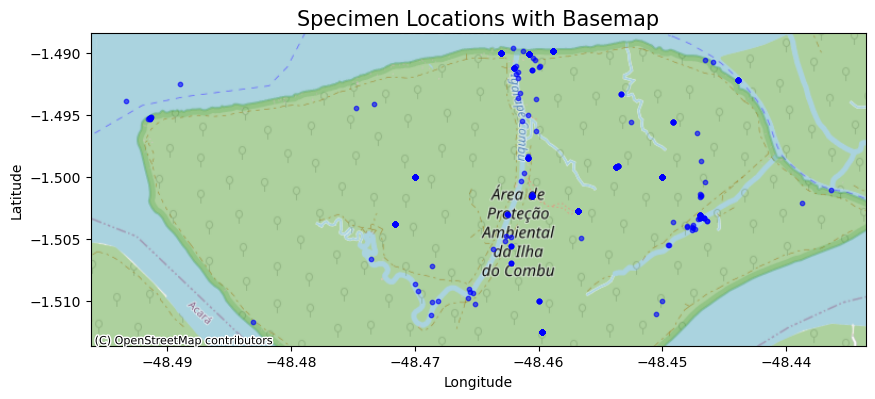

In [20]:
import geopandas as gpd
from shapely.geometry import Point
import contextily as cx
import matplotlib.pyplot as plt

# Convert latitude and longitude into points
geometry = [Point(xy) for xy in zip(df['decimalLongitude'], df['decimalLatitude'])]
geo_df = gpd.GeoDataFrame(df, geometry=geometry, crs="EPSG:4326")

# Plot the GeoDataFrame with a map background
fig, ax = plt.subplots(figsize=(10, 10))
geo_df.plot(ax=ax, markersize=10, color='blue', alpha=0.6)

# Add a basemap using contextily (OpenStreetMap tiles)
cx.add_basemap(ax, crs=geo_df.crs.to_string(), source=cx.providers.OpenStreetMap.Mapnik)

# Set titles and labels
ax.set_title('Specimen Locations with Basemap', fontsize=15)
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Show the plot
plt.show()

/var/folders/q3/_mxkmyq54p9b38bl9c_0dr5w0000gn/T/ipykernel_70059/2098112952.py:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('Set1', len(unique_kingdoms))  # Use a colormap for distinct colors


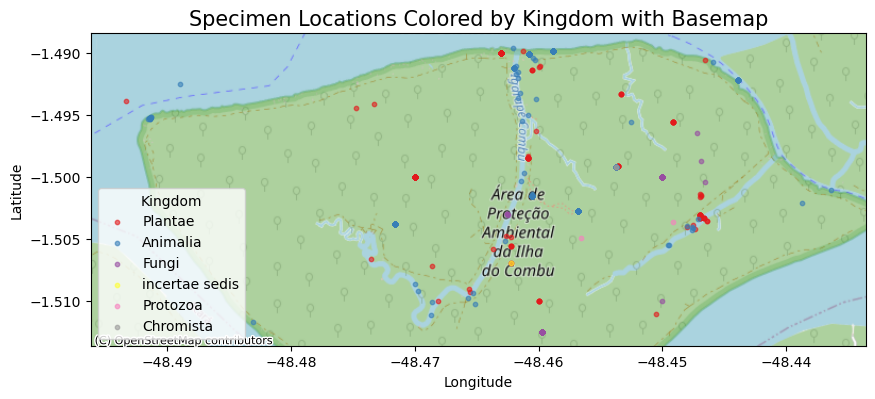

In [21]:
import geopandas as gpd
from shapely.geometry import Point
import contextily as cx
import matplotlib.pyplot as plt

# Convert latitude and longitude into points
geometry = [Point(xy) for xy in zip(df['decimalLongitude'], df['decimalLatitude'])]
geo_df = gpd.GeoDataFrame(df, geometry=geometry, crs="EPSG:4326")

# Define a color map for each unique kingdom
unique_kingdoms = geo_df['kingdom'].unique()
colors = plt.cm.get_cmap('Set1', len(unique_kingdoms))  # Use a colormap for distinct colors
kingdom_color_map = {kingdom: colors(i) for i, kingdom in enumerate(unique_kingdoms)}

# Plot the GeoDataFrame with points colored according to the kingdom
fig, ax = plt.subplots(figsize=(10, 10))

for kingdom, color in kingdom_color_map.items():
    subset = geo_df[geo_df['kingdom'] == kingdom]
    subset.plot(ax=ax, markersize=10, color=color, label=kingdom, alpha=0.6)

# Add a basemap using contextily (OpenStreetMap tiles)
cx.add_basemap(ax, crs=geo_df.crs.to_string(), source=cx.providers.OpenStreetMap.Mapnik)

# Set titles and labels
ax.set_title('Specimen Locations Colored by Kingdom with Basemap', fontsize=15)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Kingdom')

# Show the plot
plt.show()